In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

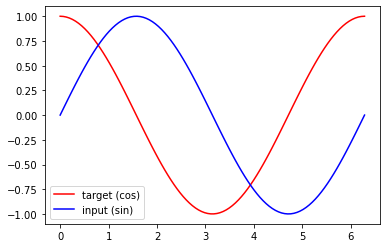

In [3]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)  # float32 for converting torch FloatTensor
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [4]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,  # 1
            hidden_size=32,
            num_layers=1,
            batch_first=True,
        )
        
        self.out = nn.Linear(32, 1)
        
    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state
    
rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [5]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()

In [9]:
# f = plt.figure(1, figsize=(12, 5))
# plt.ion()           # continuously plot

h_state = None
for step in range(60):
    dynamic_steps = np.random.randint(1, 4)    # has random time steps
    start, end = step * np.pi, (step + dynamic_steps) * np.pi  # time steps
    # use sin predict cos
    steps = np.linspace(start, end, TIME_STEP * dynamic_steps, dtype=np.float32)
    print(len(steps))
    
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])   # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    
    prediction, h_state = rnn(x, h_state)
    # !! next step is important !!
    h_state = h_state.data        # repack the hidden state, break the connection from last iteration
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # plotting
#     plt.plot(steps, y_np.flatten(), 'r-')
#     plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
#     plt.draw(); plt.pause(0.05)

# plt.ioff()
# plt.show()

30
10
10
20
10
10
10
20
20
20
10
30
30
10
10
30
30
10
30
20
10
30
20
30
30
20
30
10
20
20
20
10
30
10
10
30
30
30
20
30
10
20
10
10
10
20
20
20
30
20
30
10
30
30
10
20
20
20
20
10


<Figure size 864x360 with 0 Axes>